# Load titanic clean csv

In [107]:
import pandas as pd
df=pd.read_csv('titanic_clean.csv')

In [108]:
df

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,family_members
0,343,No,2,male,28.000000,248740,13.0000,S,Officer,0
1,76,No,3,male,25.000000,348123,7.6500,S,Mrs,0
2,641,No,3,male,20.000000,350050,7.8542,S,Mrs,0
3,568,No,3,female,29.000000,349909,21.0750,S,Mrs,4
4,672,No,1,male,31.000000,F.C. 12750,52.0000,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...
881,10,Yes,2,female,14.000000,237736,30.0708,C,Mrs,1
882,61,No,3,male,22.000000,2669,7.2292,C,Royalty,0
883,535,No,3,female,30.000000,315084,8.6625,S,Miss,0
884,102,No,3,male,29.699118,349215,7.8958,S,Mrs,0


# replacing categorical values to numerical

In [109]:
df.replace({'Sex':{'male': 1,'female':0}},inplace=True)

In [110]:
df.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)

In [111]:
df

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,family_members
0,343,0,2,1,28.000000,248740,13.0000,S,Officer,0
1,76,0,3,1,25.000000,348123,7.6500,S,Mrs,0
2,641,0,3,1,20.000000,350050,7.8542,S,Mrs,0
3,568,0,3,0,29.000000,349909,21.0750,S,Mrs,4
4,672,0,1,1,31.000000,F.C. 12750,52.0000,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...
881,10,1,2,0,14.000000,237736,30.0708,C,Mrs,1
882,61,0,3,1,22.000000,2669,7.2292,C,Royalty,0
883,535,0,3,0,30.000000,315084,8.6625,S,Miss,0
884,102,0,3,1,29.699118,349215,7.8958,S,Mrs,0


In [112]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [113]:
#features extraction
x=df[["Pclass", "Sex"]]
y= df["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
clf_tree = tree.DecisionTreeClassifier()  
clf_tree.fit(x_train, y_train)   #fitting our model
y_pred=clf_tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7808988764044944


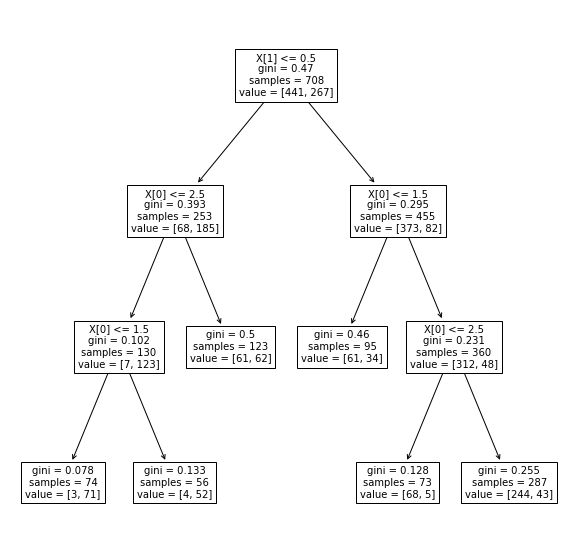

In [114]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

## interpretation: left par is for women than we have the values of servivers depending on their ticket class 

### Let's plot an other tree with different features 

In [115]:
df.replace({'Embarked':{'S': 1,'Q':0, 'C':2}},inplace=True)

In [116]:
#features extraction
x=df[["Age", "Embarked"]]
y= df["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
clf_tree = tree.DecisionTreeClassifier()  
clf_tree.fit(x_train, y_train)   #fitting our model
y_pred=clf_tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.6179775280898876


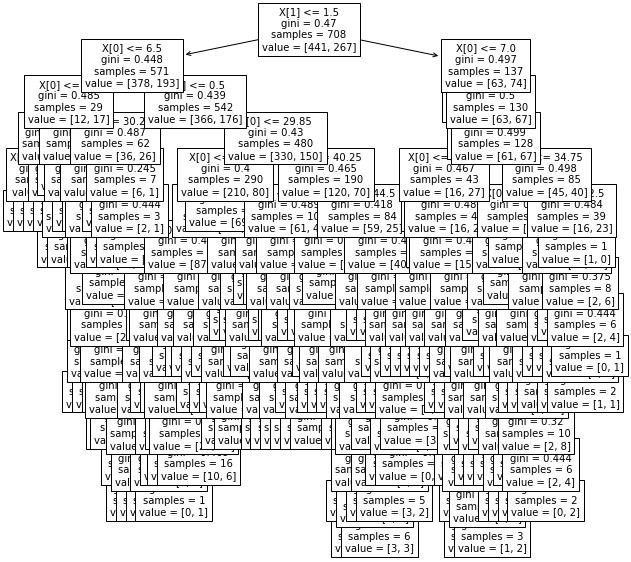

In [117]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

In [118]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family_members
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,446.044018,0.384876,2.311512,0.645598,29.453063,32.239578,1.101580,0.909707
std,257.133660,0.486841,0.834309,0.478602,12.614851,49.816530,0.512948,1.616573
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.250000,0.000000,2.000000,0.000000,22.000000,7.925000,1.000000,0.000000
50%,445.500000,0.000000,3.000000,1.000000,29.699118,14.454200,1.000000,0.000000
75%,668.750000,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,70.000000,512.329200,2.000000,10.000000


In [119]:
df.replace({'Embarked':{'S': 1,'Q':0, 'C':2}},inplace=True)

In [120]:
df.loc[df['Age'] <= 30, 'Age'] = 1


In [121]:
df.loc[df['Age'] > 30, 'Age'] = 0


In [122]:
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,family_members
881,10,1,2,0,1.0,237736,30.0708,2,Mrs,1
882,61,0,3,1,1.0,2669,7.2292,2,Royalty,0
883,535,0,3,0,1.0,315084,8.6625,1,Miss,0
884,102,0,3,1,1.0,349215,7.8958,1,Mrs,0
885,428,1,2,0,1.0,250655,26.0000,1,Miss,0


In [123]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,family_members
0,343,0,2,1,1.0,248740,13.0000,1,Officer,0
1,76,0,3,1,1.0,348123,7.6500,1,Mrs,0
2,641,0,3,1,1.0,350050,7.8542,1,Mrs,0
3,568,0,3,0,1.0,349909,21.0750,1,Mrs,4
4,672,0,1,1,0.0,F.C. 12750,52.0000,1,Mrs,1


## we made two categories depening on the age if it's >30 than it is in category 0 otherwise in 1

score:0.6348314606741573


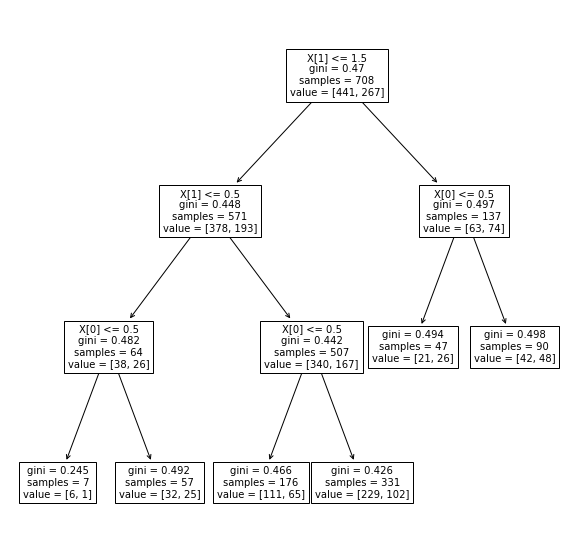

In [124]:
#features extraction
x=df[["Age", "Embarked"]]
y= df["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
clf_tree = tree.DecisionTreeClassifier()  
clf_tree.fit(x_train, y_train)   #fitting our model
y_pred=clf_tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

#### using this technic we can clearlcy visualize the tree 

## we got a better accurency thant the previous tree however, using PClass and Sex we have the best accurency

# Let's apply Random Forst on the same data set and compaire results

In [125]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

#features extraction
x=df[["Age", "Embarked", "Pclass", "Sex"]]
y= df["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model


Accuracy: 0.8033707865168539


## We got a